In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv("train.csv",usecols=['Age','Survived','Fare','SibSp'])
df.head(4)

,Survived,Age,SibSp,Fare
0,0,22.0,1,7.2500
1,1,38.0,1,71.2833
2,1,26.0,0,7.9250
3,1,35.0,1,53.1000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isna().sum()

Survived      0
Age         177
SibSp         0
Fare          0
dtype: int64

In [6]:
df.isna().mean()

Survived    0.000000
Age         0.198653
SibSp       0.000000
Fare        0.000000
dtype: float64

In [7]:
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [8]:
x_train.head()

,Age,SibSp,Fare
811,39.0,0,24.1500
29,NaN,0,7.8958
49,18.0,1,17.8000
105,28.0,0,7.8958
616,34.0,1,14.4000


In [9]:
y_train.head()

811    0
29     0
49     0
105    0
616    0
Name: Survived, dtype: int64

In [10]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [11]:
x_train.isna().sum()

Age      144
SibSp      0
Fare       0
dtype: int64

In [12]:
x_train.isna().mean()

Age      0.202247
SibSp    0.000000
Fare     0.000000
dtype: float64

In [13]:
x_test.isna().mean()

Age      0.184358
SibSp    0.000000
Fare     0.000000
dtype: float64

In [33]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

In [34]:
x_train['age_mean']=x_train['Age'].fillna(mean_age)
x_train['age_median']=x_train['Age'].fillna(median_age)

In [35]:
x_train['age_mean'].isna().sum()

0

In [36]:
x_train['age_median'].isna().sum()

0

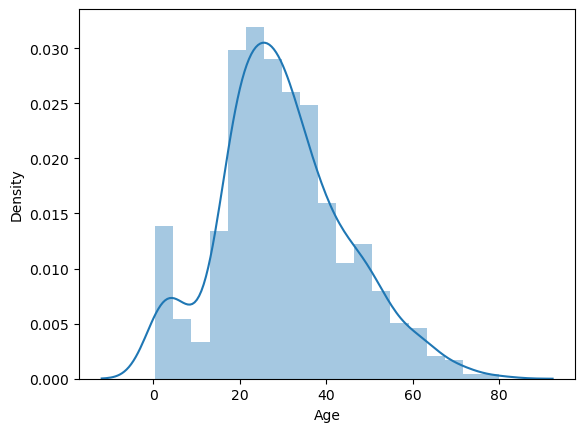

In [37]:
sns.distplot(x_train['Age'])
plt.show()

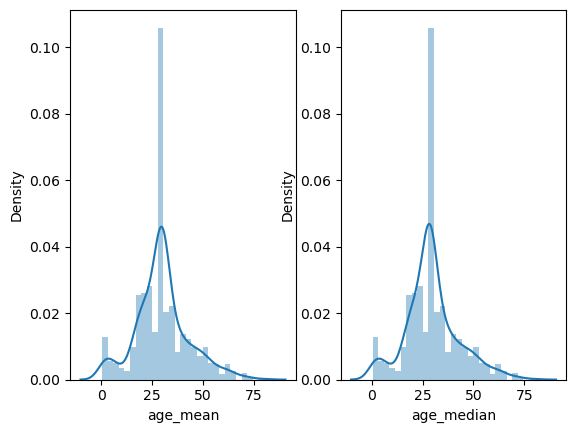

In [38]:
# after filling missing values
plt.subplot(121)
sns.distplot(x_train['age_mean'])
plt.subplot(122)
sns.distplot(x_train['age_median'])
plt.show()

In [39]:
print('Age -- ',x_train['Age'].var())
print('age_mean --',x_train['age_mean'].var())
print('ae_median --',x_train['age_median'].var())

Age --  215.50646659928697
age_mean -- 171.85958728803894
ae_median -- 172.21646907959237


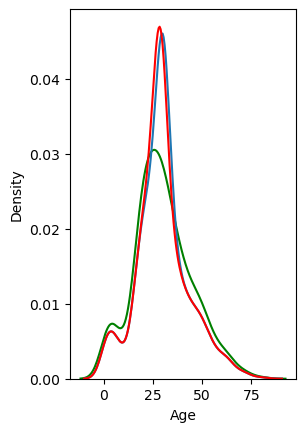

In [40]:
plt.subplot(122)
sns.kdeplot(x_train['Age'],color='green')
plt.subplot(122)
sns.kdeplot(x_train['age_mean'])
plt.subplot(122)
sns.kdeplot(x_train['age_median'],color='red')
plt.show()

In [41]:
x_train.cov()

,Age,SibSp,Fare,age_mean,age_median
Age,215.506467,-4.131563,50.550916,215.506467,215.506467
SibSp,-4.131563,1.254127,9.138365,-3.294791,-3.309352
Fare,50.550916,9.138365,2222.654295,40.312756,42.798987
age_mean,215.506467,-3.294791,40.312756,171.859587,171.859587
age_median,215.506467,-3.309352,42.798987,171.859587,172.216469


In [42]:
x_train.corr()

,Age,SibSp,Fare,age_mean,age_median
Age,1.000000,-0.302759,0.069309,1.000000,1.000000
SibSp,-0.302759,1.000000,0.173086,-0.224424,-0.225183
Fare,0.069309,0.173086,1.000000,0.065226,0.069177
age_mean,1.000000,-0.224424,0.065226,1.000000,0.998963
age_median,1.000000,-0.225183,0.069177,0.998963,1.000000


<AxesSubplot:>

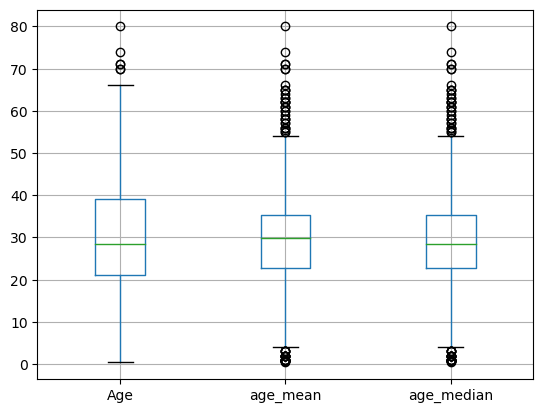

In [43]:
x_train[['Age','age_mean','age_median']].boxplot()

In [44]:
imputer_age_mean=SimpleImputer(strategy='mean')
imputer_age_median=SimpleImputer(strategy='median')

In [45]:
ct=ColumnTransformer([
    ('imputer_age_median',imputer_age_median,['age_median']),
    ('imputer_age_mean',imputer_age_mean,['age_mean'])
])

In [46]:
ct.fit(x_train)

ColumnTransformer(transformers=[('imputer_age_median',
                                 SimpleImputer(strategy='median'),
                                 ['age_median']),
                                ('imputer_age_mean', SimpleImputer(),
                                 ['age_mean'])])

In [47]:
ct.named_transformers_['imputer_age_mean'].statistics_

array([29.98621479])

In [48]:
ct.named_transformers_['imputer_age_median'].statistics_

array([28.5])

In [49]:
x_train.mean()

Age           29.986215
SibSp          0.521067
Fare          31.450433
age_mean      29.986215
age_median    29.685632
dtype: float64